In [48]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
%matplotlib inline

pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 100)

from sklearn.model_selection import learning_curve

# Explicación del conjunto de datos

Trabajaremos con un conjunto de datos de correo electrónico no deseado. El conjunto de datos tiene 57 variables predictoras con una variable de respuesta llamada `Spam` que indica si un correo electrónico es spam o no. El objetivo es poder crear un clasificador o método que actúe como un filtro de spam.

In [49]:
#Importar Dataframe y poner los nombres de las columnas
spam_df = pd.read_csv('spam.csv', header=None)
columns = ["Column_"+str(i+1) for i in range(spam_df.shape[1]-1)] + ['Spam']
spam_df.columns = columns
display(spam_df.head())

,Column_1,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10,Column_11,Column_12,Column_13,Column_14,Column_15,Column_16,Column_17,Column_18,Column_19,Column_20,Column_21,Column_22,Column_23,Column_24,Column_25,Column_26,Column_27,Column_28,Column_29,Column_30,Column_31,Column_32,Column_33,Column_34,Column_35,Column_36,Column_37,Column_38,Column_39,Column_40,Column_41,Column_42,Column_43,Column_44,Column_45,Column_46,Column_47,Column_48,Column_49,Column_50,Column_51,Column_52,Column_53,Column_54,Column_55,Column_56,Column_57,Spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


Las variables predictoras son todas continuas. Representan ciertas características como la frecuencia de la palabra "descuento". No estamos tan interesados en la inferencia exacta de cada predictor, por lo que omitiremos los nombres exactos de cada uno de las variables predictoras. Estamos más interesados en la predicción del algoritmo, por lo que trataremos a cada uno como predictor sin entrar en demasiados detalles exactos en cada uno.

Para más información sobre los datos acceder a esta URL: https://archive.ics.uci.edu/ml/datasets/spambase

Para validar el resultado sencillamente usamos Hold-out (70%30%)

In [50]:
#Dividir los datos en Training y Test usando valores aleatorios de una distribución uniforme
np.random.seed(42)
msk = np.random.rand(len(spam_df)) < 0.7
data_train = spam_df[msk]
data_test = spam_df[~msk]

#Realizamos la división para las variables predictoras y la variable respuesta
x_train, y_train = data_train.drop(['Spam'], axis=1), data_train['Spam']
x_test , y_test  = data_test.drop(['Spam'] , axis=1), data_test['Spam']

print("Shape of Training Set :",data_train.shape)
print("Shape of Testing Set :" ,data_test.shape)

('Shape of Training Set :', (3262, 58))
('Shape of Testing Set :', (1339, 58))


In [51]:
spam_df.iloc[np.arange(10)]

,Column_1,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10,Column_11,Column_12,Column_13,Column_14,Column_15,Column_16,Column_17,Column_18,Column_19,Column_20,Column_21,Column_22,Column_23,Column_24,Column_25,Column_26,Column_27,Column_28,Column_29,Column_30,Column_31,Column_32,Column_33,Column_34,Column_35,Column_36,Column_37,Column_38,Column_39,Column_40,Column_41,Column_42,Column_43,Column_44,Column_45,Column_46,Column_47,Column_48,Column_49,Column_50,Column_51,Column_52,Column_53,Column_54,Column_55,Column_56,Column_57,Spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.00,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1
6,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,0.96,1.28,0.00,0.00,0.00,0.96,0.00,0.32,3.85,0.00,0.64,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.054,0.0,0.164,0.054,0.000,1.671,4,112,1
7,0.00,0.00,0.00,0.0,1.88,0.00,0.00,1.88,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.206,0.0,0.000,0.000,0.000,2.450,11,49,1
8,0.15,0.00,0.46,0.0,0.61,0.00,0.30,0.00,0.92,0.76,0.76,0.92,0.00,0.00,0.00,0.00,0.00,0.15,1.23,3.53,2.00,0.0,0.00,0.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.15,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.30,0.00,0.00,0.00,0.0,0.0,0.00,0.271,0.0,0.181,0.203,0.022,9.744,445,1257,1
9,0.06,0.12,0.77,0.0,0.19,0.32,0.38,0.00,0.06,0.00,0.00,0.64,0.25,0.00,0.12,0.00,0.00,0.12,1.67,0.06,0.71,0.0,0.19,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.06,0.00,0.00,0.0,0.0,0.04,0.030,0.0,0.244,0.081,0.000,1.729,43,749,1


Podemos verificar que la cantidad de casos de spam esté representada de manera más o menos uniforme tanto en la capacitación tanto en el training como en el test.

In [52]:
#Check Percentage of Spam in Train and Test Set
percentage_spam_training = 100*y_train.sum()/len(y_train)
percentage_spam_testing  = 100*y_test.sum()/len(y_test)
                                                  
print("Percentage of Spam in Training Set \t : {:0.2f}%.".format(percentage_spam_training))
print("Percentage of Spam in Testing Set \t : {:0.2f}%.".format(percentage_spam_testing))

Percentage of Spam in Training Set 	 : 39.00%.
Percentage of Spam in Testing Set 	 : 39.00%.



--------


# Bagging y Voting

De dón de viene la palabra "*Bagging*"?

#### Insistimos en la teoría: Qué es bagging?
  1. Bootstrapping: muestrear con reemplazo para obtener diferentes conjuntos de datos y construir modelos diferentes.
  2. Hacer algo inteligente para combinar los diferentes modelos.
  
Una forma de ajustar la alta varianza de la salida de un experimento es realizar el experimento varias veces y luego promediar los resultados.

 1. **Bootstrap:** Generamos múltiples muestras de datos de entrenamiento, mediante bootstrapping. Entrenamos un árbol de decisión completo con cada muestra de datos.
 2. **AGgregatiING** para una entrada dada, sacamos las salidas promediadas de todos los modelos para esa entrada. 
 
**Bagging: B** ootstrap + **AGG**regat**ING**. 

-----------

Aplicamos Bootstap para nuestro conjunto de datos de entrenamiento para crear múltiples conjuntos de datos y ajustar un árbol de decisión a cada uno.

(Resampling: mostramos en vivo que diferentes muestras dan diferentes resultados en global, variando más cuando los modelos que agregamos tienen una alta varianza).

In [53]:
# Estadísticas sobre todos los datos
data_train.mean(axis=0).to_frame('mean').T

,Column_1,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10,Column_11,Column_12,Column_13,Column_14,Column_15,Column_16,Column_17,Column_18,Column_19,Column_20,Column_21,Column_22,Column_23,Column_24,Column_25,Column_26,Column_27,Column_28,Column_29,Column_30,Column_31,Column_32,Column_33,Column_34,Column_35,Column_36,Column_37,Column_38,Column_39,Column_40,Column_41,Column_42,Column_43,Column_44,Column_45,Column_46,Column_47,Column_48,Column_49,Column_50,Column_51,Column_52,Column_53,Column_54,Column_55,Column_56,Column_57,Spam
mean,0.105984,0.206603,0.284908,0.06607,0.309537,0.096462,0.11218,0.110368,0.088734,0.243182,0.062624,0.537961,0.096045,0.056395,0.049942,0.265929,0.139779,0.188832,1.691186,0.097235,0.81599,0.120224,0.097961,0.088694,0.528384,0.256327,0.776444,0.128697,0.097863,0.110806,0.064712,0.050377,0.102446,0.050635,0.112554,0.102541,0.135935,0.014834,0.081824,0.06897,0.039641,0.123467,0.045371,0.072471,0.308231,0.182955,0.005607,0.03191,0.036318,0.141634,0.018758,0.277636,0.071341,0.051376,5.300716,52.760883,278.253525,0.391784


In [54]:
data_train.sample(frac=1., replace=True).mean(axis=0).to_frame('mean').T

,Column_1,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10,Column_11,Column_12,Column_13,Column_14,Column_15,Column_16,Column_17,Column_18,Column_19,Column_20,Column_21,Column_22,Column_23,Column_24,Column_25,Column_26,Column_27,Column_28,Column_29,Column_30,Column_31,Column_32,Column_33,Column_34,Column_35,Column_36,Column_37,Column_38,Column_39,Column_40,Column_41,Column_42,Column_43,Column_44,Column_45,Column_46,Column_47,Column_48,Column_49,Column_50,Column_51,Column_52,Column_53,Column_54,Column_55,Column_56,Column_57,Spam
mean,0.104586,0.161355,0.294344,0.067456,0.321128,0.097124,0.104445,0.106082,0.084644,0.228081,0.059675,0.516585,0.102977,0.057069,0.051088,0.263734,0.131983,0.19591,1.675064,0.089513,0.833771,0.135383,0.090889,0.087262,0.541787,0.247376,0.865622,0.126174,0.101257,0.111714,0.073725,0.065074,0.097719,0.065071,0.123697,0.11088,0.13153,0.020055,0.074323,0.081901,0.040028,0.122039,0.045699,0.07134,0.296125,0.212872,0.004546,0.029997,0.035429,0.144527,0.018911,0.281194,0.076047,0.047938,4.768751,51.659105,278.940834,0.40466


Ahora ajustamos las muestras con una estrategia Bagging con árboles de decisión

In [55]:
n_trees = 100 # probemos diferente número de árboles
choosen_depth = 7

In [56]:
#Crear el modelo
np.random.seed(0)
model = DecisionTreeClassifier(max_depth=choosen_depth)

#Inicializar variables
predictions_train = np.zeros((data_train.shape[0], n_trees))
predictions_test = np.zeros((data_test.shape[0], n_trees))

#Realizar iteraciones de bootstrapping
for i in range(n_trees):
    temp = data_train.sample(frac=1, replace=True)
    response_variable = temp['Spam']
    temp = temp.drop(['Spam'], axis=1)
    
    model.fit(temp, response_variable)  
    predictions_train[:,i] = model.predict(x_train)   
    predictions_test[:,i] = model.predict(x_test)
    
#Crear el Dataframe de predicciones
columns = ["Bootstrap-Model_"+str(i+1) for i in range(n_trees)]
predictions_train = pd.DataFrame(predictions_train, columns=columns)
predictions_test = pd.DataFrame(predictions_test, columns=columns)

In [57]:
y_train = data_train['Spam'].values
y_test = data_test['Spam'].values

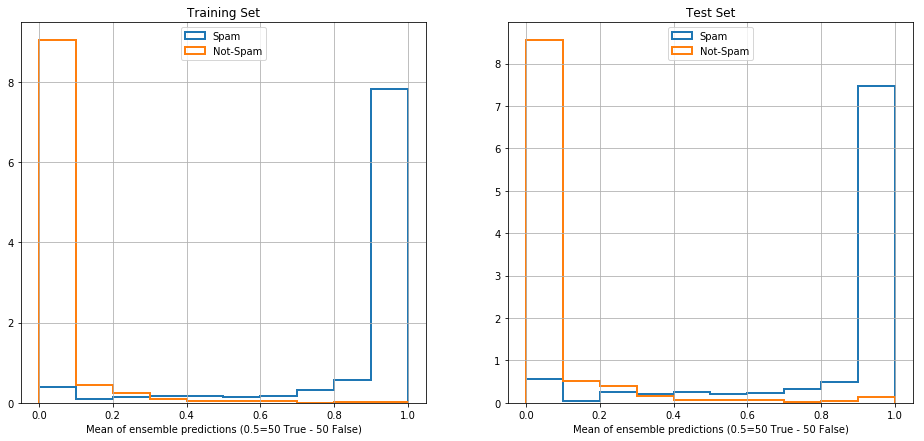

In [58]:
num_to_avg = 100
fig, axs = plt.subplots(1, 2, figsize=(16, 7))
for (ax, label, predictions, y) in [
    (axs[0], 'Training Set', predictions_train, y_train), 
    (axs[1], 'Test Set' , predictions_test , y_test ) ]:
    
    # Calcular la media
    mean_predictions = predictions.iloc[:,:num_to_avg].mean(axis=1)
    
    # Mostrar los casos con Spam
    mean_predictions[y == 1].hist(density=True, histtype='step', 
                                  range=[0,1], label='Spam', lw=2, ax=ax)
    
    # Mostrar los casos sin Spam
    mean_predictions[y == 0].hist(density=True, histtype='step', 
                                  range=[0,1], label='Not-Spam', lw=2, ax=ax)
    ax.legend(loc='upper center');
    ax.set_xlabel("Mean of ensemble predictions (0.5=50 True - 50 False)")
    ax.set_title(label)


Y ahora obtenga predicciones finales: ¡votación por mayoría!

In [59]:
#Función para ensamblar la predicción de cada modelo de árbol de decisión
def get_prediction(df, count=-1):
    count = df.shape[1] if count==-1 else count
    temp = df.iloc[:,0:count]
    return np.mean(temp, axis=1)>0.5

#Verificar la precisión de la detección spam en el dataset de training y de test
acc_bagging_training = 100*accuracy_score(y_train, get_prediction(predictions_train, count=-1))
acc_bagging_testing  = 100*accuracy_score(y_test, get_prediction(predictions_test, count=-1))

print("Bagging: \tAccuracy, Training Set \t: {:0.2f}%".format(acc_bagging_training))
print("Bagging: \tAccuracy, Testing Set \t: {:0.2f}%".format( acc_bagging_testing))

Bagging: 	Accuracy, Training Set 	: 95.37%
Bagging: 	Accuracy, Testing Set 	: 92.76%


La variable count en el código anterior se puede usar para definir el número de modelos en los que se va a basar la votación

In [60]:
#Obtener rendimiento por clase mediante la matriz de confusión
pd.crosstab(np.array(y_test), model.predict(x_test), margins=True, rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1,All
Actual,,,
0,751,53,804
1,66,469,535
All,817,522,1339



**Pregunta :** ¿Son estos modelos bagging independientes uno del otro, pueden ser entrenados en forma paralela?

# Part 4 : Random Forest vs Bagging

#### Qué es random forest? 

- **Mucho árboles** hacen el **bosque**.
- **Muchos árboles aleatorios** hacen un **bosque aleatorio**.


Random Forest es una forma modificada de bagging que crea conjuntos de árboles de decisión independientes. 
Par reducir la correlación en ellos: 
1. Entrenar a cada árbol en un bootstrap separado **muestra aleatoria** del conjunto de entrenamiento completo (igual que en el bagging)
2. Para cada árbol, en cada división, **seleccionamos aleatoriamente un conjunto de predictores 𝐽 ′ del conjunto completo de predictores.** (no realizado en bagging)
3. De entre los predictores 𝐽 ', seleccionamos el predictor óptimo y el umbral correspondiente óptimo para la división.

Ahora, ajustaremos la técnica Random Forest. Usaremos ```n_estimators = predictor_count / 2``` y ``` max_depth = 7```.

In [61]:
max_depth = 7
#Fit a Random Forest Model

#Training
model = RandomForestClassifier(n_estimators=int(x_train.shape[1]/2), max_depth=max_depth, max_features = 7)
model.fit(x_train, y_train)

#Predict
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

#Perfromance Evaluation
acc_random_forest_training = accuracy_score(y_train, y_pred_train)*100
acc_random_forest_testing = accuracy_score(y_test, y_pred_test)*100

print("Random Forest: Accuracy, Training Set : {:0.2f}%".format(acc_random_forest_training))
print("Random Forest: Accuracy, Testing Set :  {:0.2f}%".format(acc_random_forest_testing))

Random Forest: Accuracy, Training Set : 94.79%
Random Forest: Accuracy, Testing Set :  93.43%


Modifica manualmente max_depth entre 4 y 20 y analizar qué está pasando.

#### Comparemos la fiabilidad de nuestros 2 modelos:

In [62]:
print("\nBagging: \tAccuracy, Training Set \t: {:0.2f}%".format(acc_bagging_training))
print("Bagging: \tAccuracy, Testing Set \t: {:0.2f}%".format( acc_bagging_testing))

print("\nRandom Forest: \tAccuracy, Training Set \t: {:0.2f}%".format(acc_random_forest_training))
print("Random Forest: \tAccuracy, Testing Set \t: {:0.2f}%".format(acc_random_forest_testing))


Bagging: 	Accuracy, Training Set 	: 95.37%
Bagging: 	Accuracy, Testing Set 	: 92.76%

Random Forest: 	Accuracy, Training Set 	: 94.79%
Random Forest: 	Accuracy, Testing Set 	: 93.43%


#### Como vemos arriba, la fiabilidad de Bagging y Random Forest es similar, entonces, ¿cuál es la diferencia? ¿Ambas se ajustan demasiado los datos?

Pista:

- ¿Cuál es el único parámetro adicional que declaramos al definir un modelo de random forest vs bagging? ¿Tiene algún impacto en el sobreajuste?
- Probar a cambiar ese parámetro, qué notais?

In [64]:
# Llevar el árbol de decisión a una profundidad bastante mayor

new_depth = max_depth + 20 

#Training
model = RandomForestClassifier(n_estimators=int(x_train.shape[1]/2), max_depth=new_depth)
model.fit(x_train, y_train)

#Predict
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

#Perfromance Evaluation
acc_random_forest_deeper_training = accuracy_score(y_train, y_pred_train)*100
acc_random_forest_deeper_testing = accuracy_score(y_test, y_pred_test)*100

print("Random Forest: Accuracy, Training Set (Deeper): {:0.2f}%".format(acc_random_forest_deeper_training))
print("Random Forest: Accuracy, Testing Set (Deeper):  {:0.2f}%".format(acc_random_forest_deeper_testing))

Random Forest: Accuracy, Training Set (Deeper): 99.82%
Random Forest: Accuracy, Testing Set (Deeper):  94.47%


#### Training accuracies:

In [65]:
print("Training Accuracies:")
print("Bagging: \tAccuracy, Training Set \t: {:0.2f}%".format(acc_bagging_training))
print("Random Forest: \tAccuracy, Training Set \t: {:0.2f}%".format(acc_random_forest_training))
print("RF Deeper: \tAccuracy, Training Set \t: {:0.2f}%".format(acc_random_forest_deeper_training))

Training Accuracies:
Bagging: 	Accuracy, Training Set 	: 95.37%
Random Forest: 	Accuracy, Training Set 	: 94.79%
RF Deeper: 	Accuracy, Training Set 	: 99.82%


#### Testing accuracies:

In [66]:
print("Testing Accuracies:")
print("Bagging: \tAccuracy, Testing Set \t: {:0.2f}%".format( acc_bagging_testing))
print("Random Forest: \tAccuracy, Testing Set \t: {:0.2f}%".format(acc_random_forest_testing))
print("RF Deeper:  \tAccuracy, Testing Set \t: {:0.2f}%".format(acc_random_forest_deeper_testing))

Testing Accuracies:
Bagging: 	Accuracy, Testing Set 	: 92.76%
Random Forest: 	Accuracy, Testing Set 	: 93.43%
RF Deeper:  	Accuracy, Testing Set 	: 94.47%


#### Importancia de las variables
Random Forest da los valores anteriores como ```feature_importance```, donde normaliza el impacto de una variable predictora en la cantidad de veces que es útil y, por lo tanto, otorga una importancia general de forma implícita. Vamos a explorar los atributos del objeto modelo Random Forest.

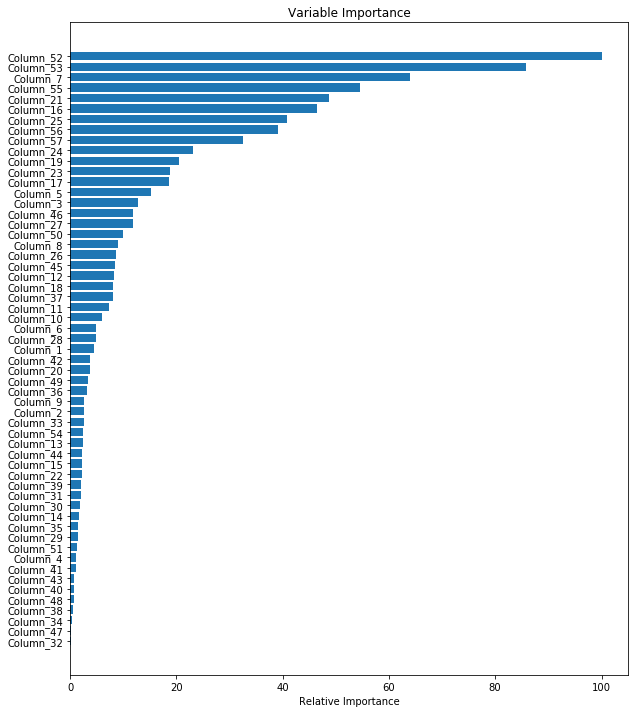

In [48]:
#Top Features
feature_importance = model.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

#Plot
plt.figure(figsize=(10,12))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, x_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()